<a href="https://colab.research.google.com/github/Md-Younus-Khan/Working-with-MNIST-dataset/blob/main/Training_and_testing_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
import cv2
from PIL import Image as Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mean_gray = 0.1307
stddev_gray = 0.3081

transforms_data = transforms.Compose([transforms.ToTensor(),transforms.Normalize((mean_gray),(stddev_gray))])

train_dataset = datasets.MNIST(root = './data',
                              train = True,
                              transform = transforms_data,
                              download = True)
test_dataset = datasets.MNIST(root = './data',
                             train = False,
                             transform = transforms_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16326006.91it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 487440.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4491351.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4026744.61it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
      super(CNN,self).__init__()
      self.cnn1= nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding =1)
      self.batchnorm1 = nn.BatchNorm2d(8)
      self.relu = nn.ReLU()
      self.maxpool = nn.MaxPool2d(kernel_size = 2)

      self.cnn2= nn.Conv2d(in_channels =8, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
      self.batchnorm2 = nn.BatchNorm2d(32)
      self.fc1 = nn.Linear(7*7*32, 600)
      self.dropout = nn.Dropout(p= 0.5)
      self.fc2 = nn.Linear(600,10)

  def forward(self,x):
      out = self.cnn1(x)
      out = self.batchnorm1(out)
      out = self.relu(out)
      out = self.maxpool(out)
      out = self.cnn2(out)
      out = self.batchnorm2(out)
      out = self.relu(out)
      out = self.maxpool(out)
#flatten
      out = out.view(-1, 1568)
      out = self.fc1(out)
      out = self.relu(out)
      out = self.dropout(out)
      out = self.fc2(out)
      return out

In [ ]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
   model = model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
#trainning the CNN
num_epochs = 10
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
    training_loss = 0.0
    correct = 0
    iteration = 0

    model.train()

    for i, (inputs, labels) in enumerate(train_loader):

        if CUDA:
           inputs = inputs.cuda()
           labels = labels.cuda()
        outputs = model(inputs)
        loss = loss_func(outputs,labels)
        training_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _,predicted = torch.max(outputs,1)
        correct += (predicted==labels).sum().item()
        iteration += 1

    train_loss.append(training_loss/iteration)
    train_accuracy.append(100*correct/len(train_dataset))

    #testing phase

    testing_loss = 0.0
    correct = 0
    iteration = 0

    model.eval()

    for i, (inputs, labels) in enumerate(test_loader):

        if CUDA:
           inputs = inputs.cuda()
           labels = labels.cuda()
        outputs = model(inputs)
        loss = loss_func(outputs,labels)
        testing_loss += loss.item()

        _,predicted = torch.max(outputs,1)
        correct += (predicted==labels).sum().item()
        iteration += 1

       # print('c:{}, it: {}'.format(correct, iteration))

    test_loss.append(testing_loss/iteration)
    test_accuracy.append(100*correct/len(test_dataset))

    print('Epoch: {}/{}, Training loss: {:.3f}, Training accuracy: {:.3f}, Testing loss: {:.3f}, Testing accuracy: {:.3f}'.format(epoch+1,num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

Epoch: 1/10, Training loss: 0.665, Training accuracy: 81.123, Testing loss: 0.077, Testing accuracy: 97.670
Epoch: 2/10, Training loss: 0.188, Training accuracy: 94.263, Testing loss: 0.060, Testing accuracy: 98.180
Epoch: 3/10, Training loss: 0.126, Training accuracy: 96.293, Testing loss: 0.057, Testing accuracy: 98.370
Epoch: 4/10, Training loss: 0.093, Training accuracy: 97.255, Testing loss: 0.047, Testing accuracy: 98.670
Epoch: 5/10, Training loss: 0.084, Training accuracy: 97.520, Testing loss: 0.041, Testing accuracy: 98.730
Epoch: 6/10, Training loss: 0.074, Training accuracy: 97.817, Testing loss: 0.043, Testing accuracy: 98.800
Epoch: 7/10, Training loss: 0.068, Training accuracy: 98.028, Testing loss: 0.036, Testing accuracy: 98.820
Epoch: 8/10, Training loss: 0.059, Training accuracy: 98.252, Testing loss: 0.035, Testing accuracy: 99.070
Epoch: 9/10, Training loss: 0.059, Training accuracy: 98.312, Testing loss: 0.046, Testing accuracy: 98.600
Epoch: 10/10, Training loss:

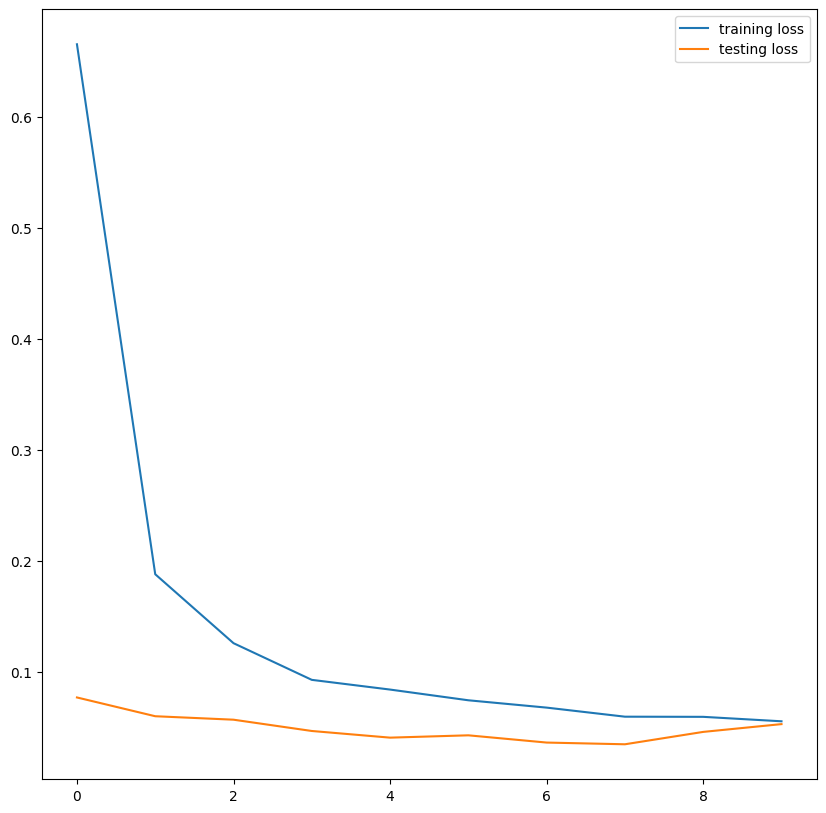

In [ ]:
#plotting the loss
plt.figure(figsize = (10,10))
plt.plot(train_loss, label ='training loss')
plt.plot(test_loss, label = 'testing loss')
plt.legend()
plt.show()

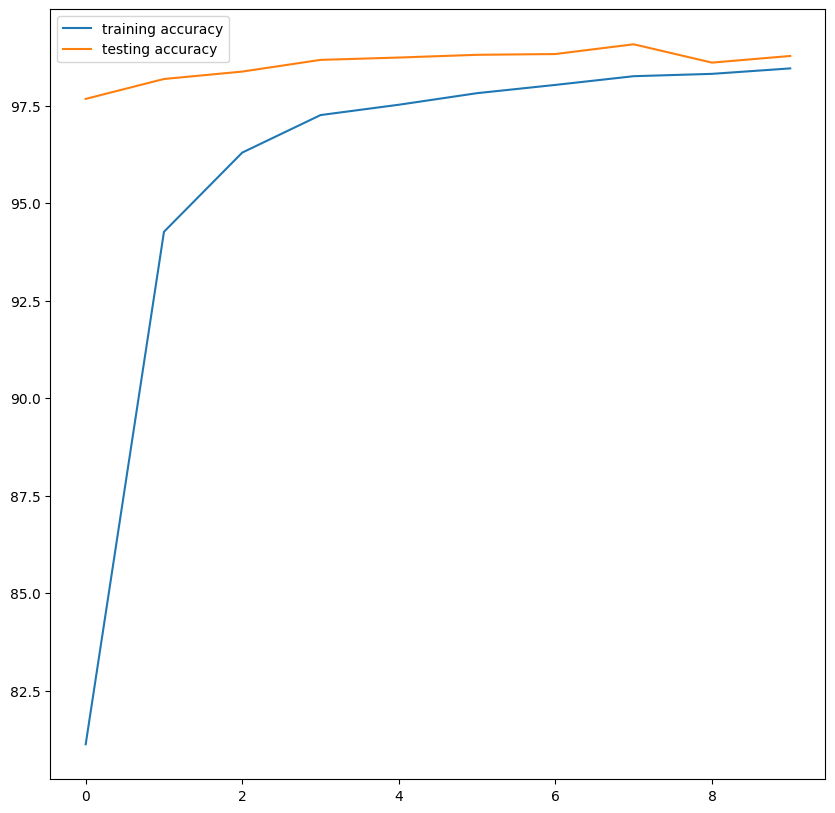

In [ ]:
#plotting the accuracy
plt.figure(figsize = (10,10))
plt.plot(train_accuracy, label ='training accuracy')
plt.plot(test_accuracy, label = 'testing accuracy')
plt.legend()
plt.show()

In [ ]:

#predicting an image from test data
img = test_dataset[12][0].resize_((1,1,28,28))
label = test_dataset[12][1]

model.eval()

if CUDA:
   img = img.cuda()
   model = model.cuda()

output = model(img)
_,predicted = torch.max(output, 1)
print('predicted output: {}'.format(predicted.item()))
print('actual is: {}'.format(label))

predicted output: 9
actual is: 9


tensor([[-14.0230,  -9.2661, -20.9917,  -6.3143, -21.4686,  23.8687,  -4.9265,
         -10.4489,  -8.3702,  -2.6054]])
prediction is :5


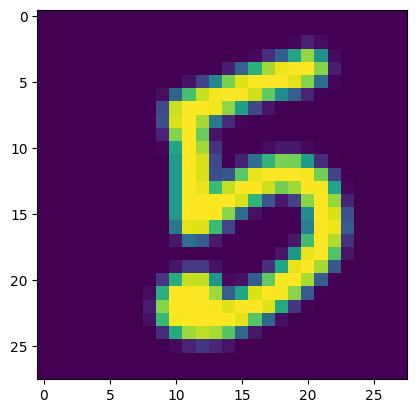

In [ ]:
# predicting my own handwritten image

transforms_photo = transforms.Compose([transforms.Resize((28,28)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((mean_gray,),(stddev_gray,))])
def predict(img_name, model):
    image = cv2.imread(img_name, 0)
    ret,thresholded = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    img = 255-thresholded

    img = Image.fromarray(img)
    img = transforms_photo(img)
    img = img.view(1,1,28,28)
    img = Variable(img)
    plt.imshow(img.reshape(28,28))

    model.eval()

    if CUDA:
       img = img.cuda()
       model = model.cuda()

    output = model(img)
    print(output.data)
    _,predicted = torch.max(output, 1)
    return predicted.item()

pred = predict('five.jpg', model)
print('prediction is :{}'.format(pred))